<a href="https://colab.research.google.com/github/Anan-punathil/CODETECH-Tasks/blob/main/project_on_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Numpy** **&** **Pandas**

In [ ]:
pip install numpy pandas

## **Importing necessary libraries**

In [ ]:

import numpy as np
import pandas as pd


## **Analysing the Dataset**  : Loading and Getting the overview

In [ ]:
pip install openpyxl



# Read the  file
df = pd.read_excel('telecom_churn.xlsx')


In [ ]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print(df.shape)

(3333, 20)


In [ ]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df["Churn"] = df["Churn"].astype("int64")

In [ ]:
df["Churn"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Churn, dtype: int64

## Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

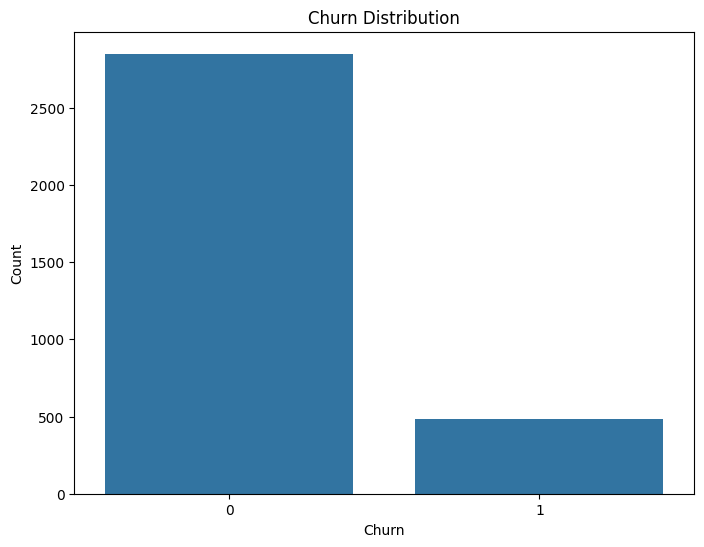

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Churn",data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Addressing Imbalanced Data

If your data is imbalanced, you can consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.

Remember: The best approach depends on the specific characteristics of your dataset and the problem you're trying to solve.

## OverSampling

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

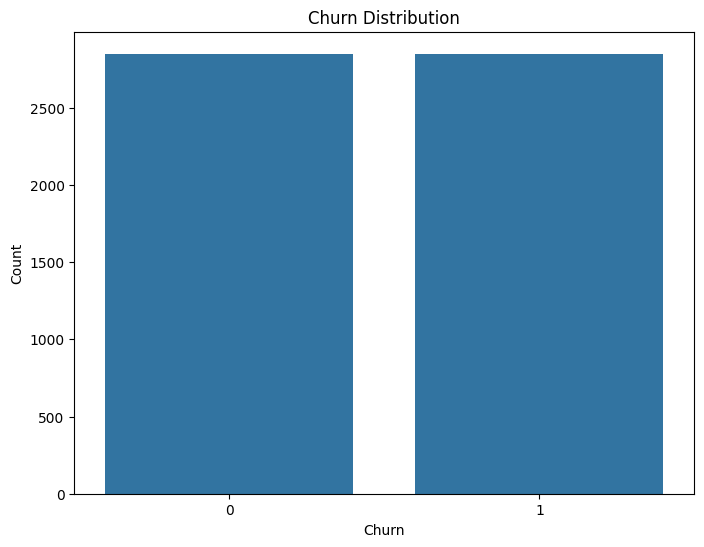

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Churn",data=data_resampled)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
data_resampled.shape

(5700, 20)

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [ ]:

df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [ ]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [ ]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


In [ ]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [ ]:
# Select the last row of the DataFrame
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## **Applying Functions to Cells, Columns and Rows**
# To apply functions to each column, use apply():

In [ ]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

**The apply method can also be used to apply a function to each row. To do this, specify axis=1.
Lambda functions are very convenient in such scenarios.**

In [ ]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:

In [ ]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with the replace method:

In [ ]:
df = df.replace({"Voice mail plan": d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


### Univariate analysis

Value counts of State
State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64




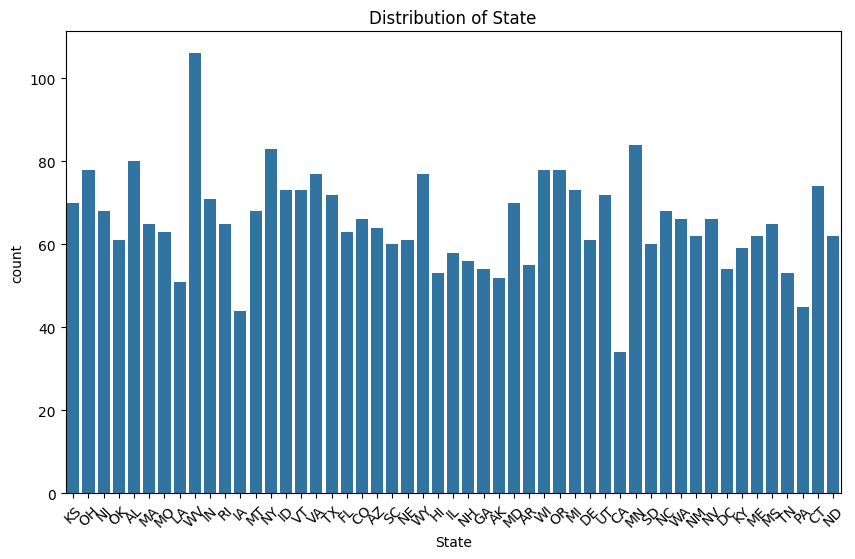

Value counts of International plan
International plan
False    3010
True      323
Name: count, dtype: int64




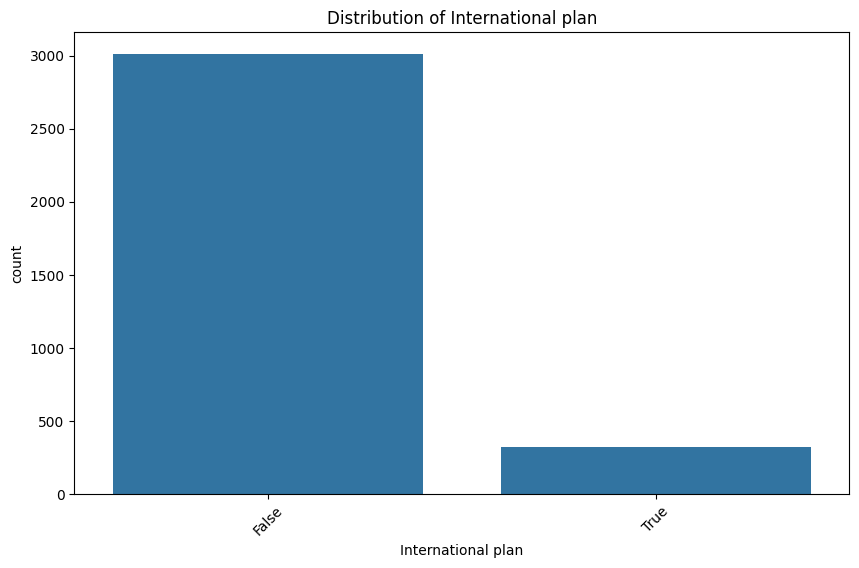

Value counts of Voice mail plan
Voice mail plan
False    2411
True      922
Name: count, dtype: int64




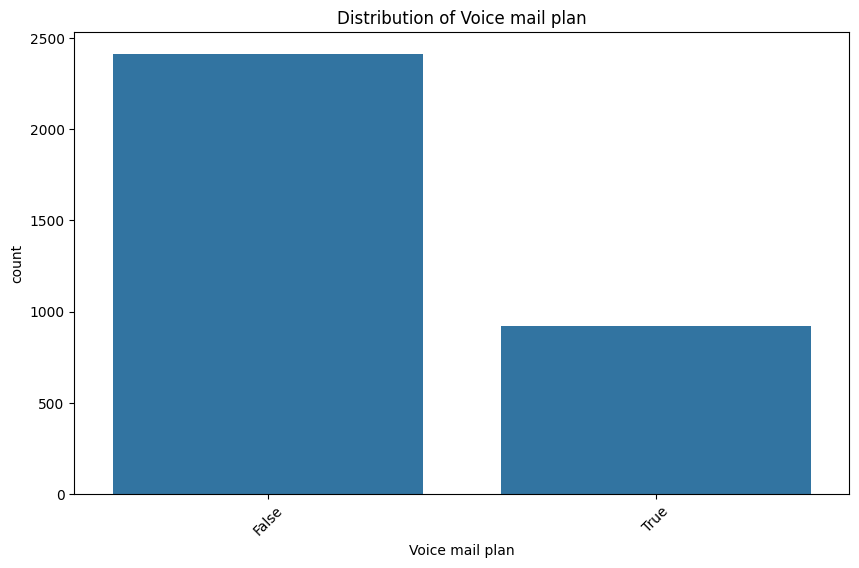

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# Categorical variables
for column in df.select_dtypes(include=['object','bool']).columns:
    print(f'Value counts of {column}')
    print(df[column].value_counts())
    print('\n')


    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

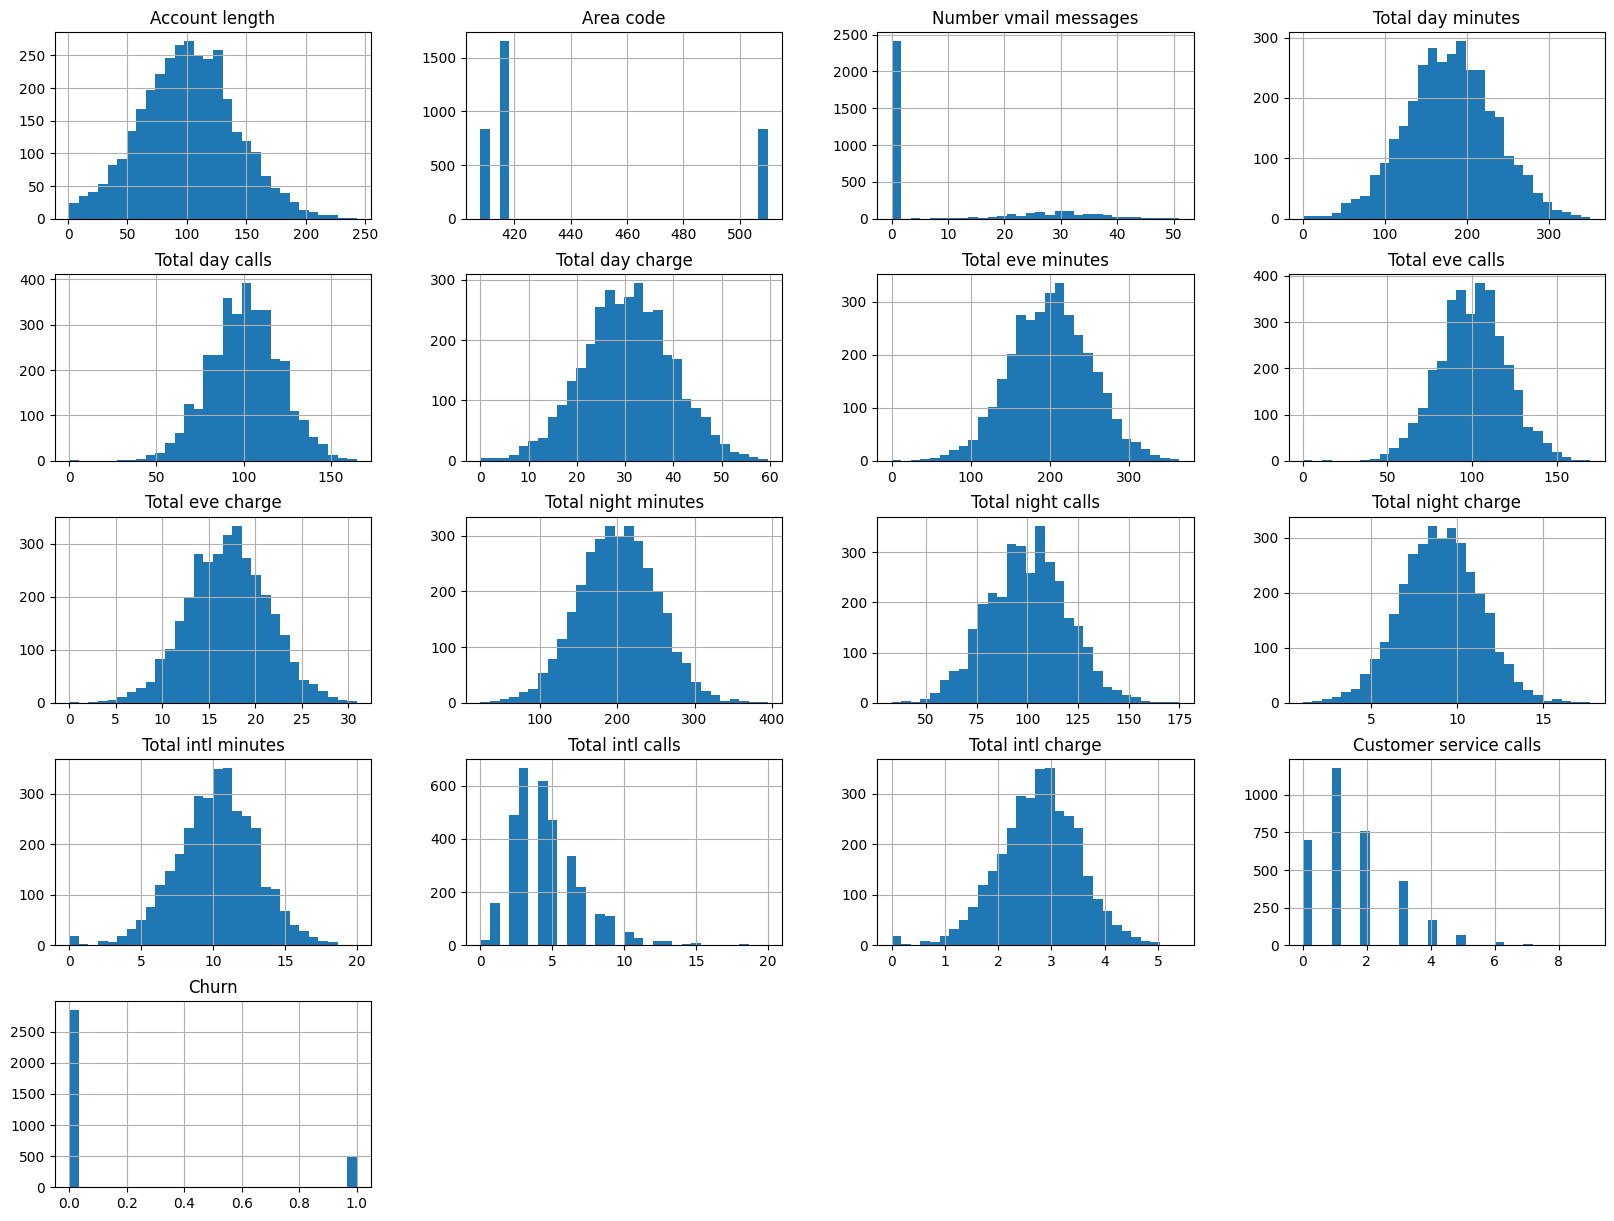

In [ ]:
# Numerical variables
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Bivariate analysis

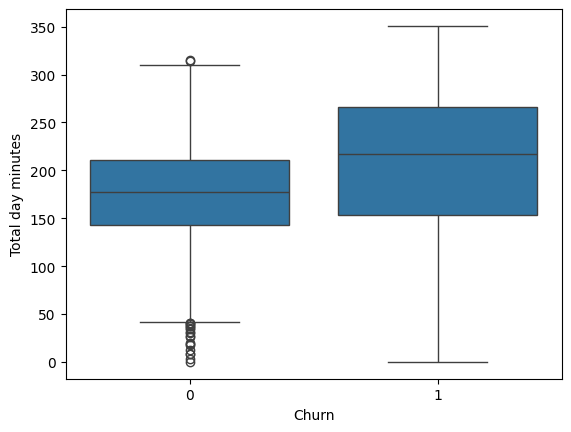

In [ ]:

# Categorical vs numerical
sns.boxplot(x='Churn', y='Total day minutes', data=df)
plt.show()

In [ ]:
df['Total day minutes'].skew()

-0.029077067143188955

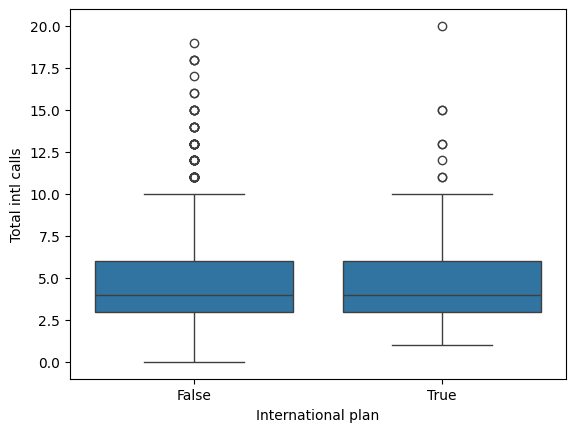

In [ ]:
sns.boxplot(x='International plan', y='Total intl calls', data=df)
plt.show()

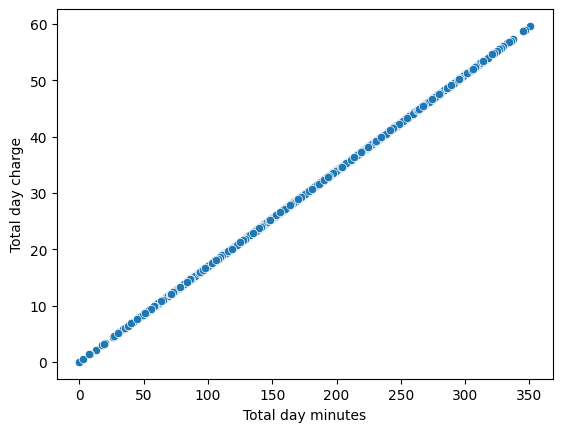

In [ ]:
#Numerical vs numerical
sns.scatterplot(x='Total day minutes', y='Total day charge', data=df)
plt.show()



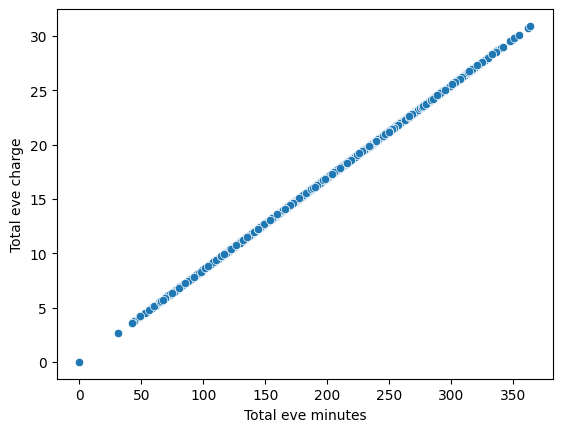

In [ ]:
sns.scatterplot(x='Total eve minutes', y='Total eve charge', data=df)
plt.show()

## Feature Engineering

In [ ]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
#df['total_calls']=total_calls
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [ ]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [ ]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [ ]:
print("Dataset size and structure:")
print(df.shape)
print(df.info())

Dataset size and structure:
(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   bool   
 4   Voice mail plan         3333 non-null   bool   
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  T

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())  # Check for missing values


Missing values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


## The data types of each variable, and conversion

In [ ]:
print("\nData types of each variable:")
print(df.dtypes)


Data types of each variable:
State                      object
Account length              int64
Area code                   int64
International plan           bool
Voice mail plan              bool
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object


## The distribution of each variable

In [ ]:
print("\nDistribution of each variable:")
df.describe().T  #transform


Distribution of each variable:


,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## Data Visualization

To understand the data, we dive into visualization using any of the visualization modules in python.

Given the mix of categorical and numerical variables, we can explore various visualization techniques:

Univariate Visualization

Bivariate Visualization

Multivariate Visualization


#### Analysis after visualization:
Are there any patterns or trends in the data?

Trend analysis or seasonal decomposition can be performed on time series data if applicable

Are there any interesting relationships or insights that can be gained from visualizing the data?

Visualization libraries like Matplotlib or Seaborn can be used to plot relationships between variables

Can you propose a machine learning model to predict customer churn based on the dataset?

How would you validate the performance of the churn prediction model?

other than churn what else can be predicted ?

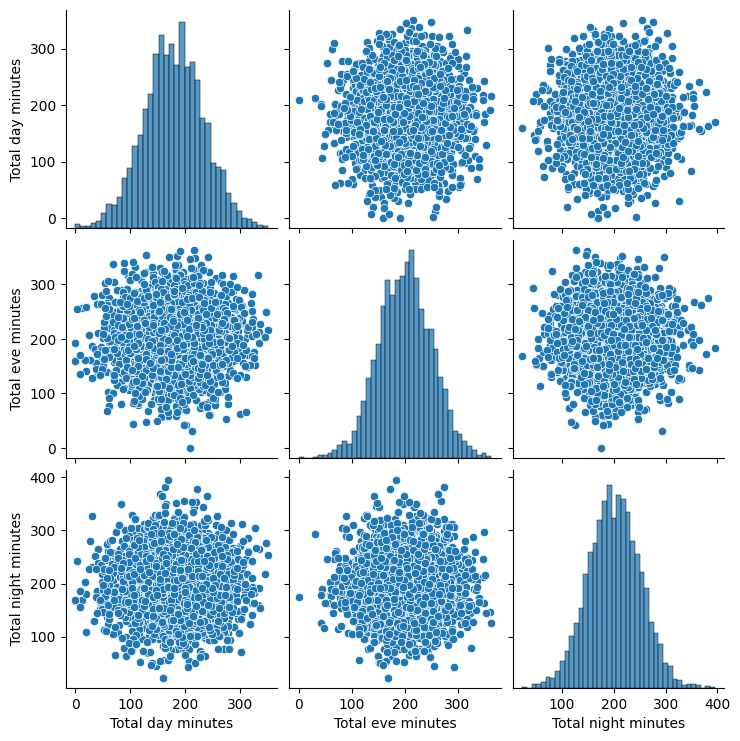

In [ ]:
sns.pairplot(df[['Total day minutes', 'Total eve minutes', 'Total night minutes']])
plt.show()

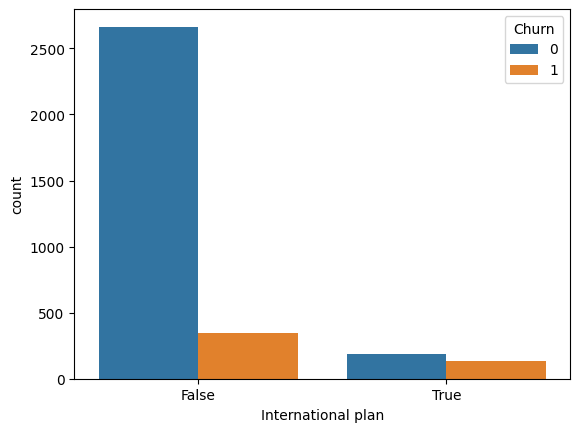

In [ ]:
# Churn rate by International plan
sns.countplot(x='International plan', hue='Churn', data=df)
plt.show()

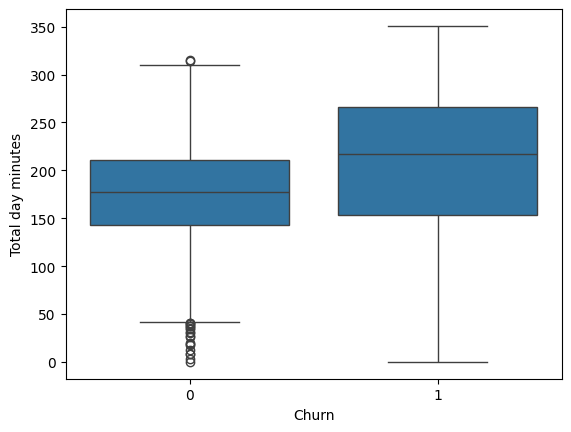

In [ ]:
# Box plot of total day minutes by Churn
sns.boxplot(x='Churn', y='Total day minutes', data=df)
plt.show()

## Outlier Detection Methods
For numerical features, we can use statistical methods and visualization techniques to detect outliers.

Statistical Methods
    Z-score: Measures how many standard deviations a data point is from the mean.
    IQR (Interquartile Range): Identifies outliers based on quartiles.

Visualization
    Box plots: Visualize outliers graphically.
    Scatter plots: Identify unusual patterns or isolated points.


In [ ]:


# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Apply outlier detection to numerical columns
outliers = df[numerical_cols].apply(iqr_outliers)

# Identify rows with outliers
outlier_rows = df[outliers.any(axis=1)]

# Count total outlier rows
total_outlier_rows = len(outlier_rows)

print("Total outlier rows:", total_outlier_rows)

Total outlier rows: 834


In [ ]:
df.shape

(3333, 20)

In [ ]:
from scipy import stats

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-scores
df[numerical_cols] = stats.zscore(df[numerical_cols])

# Apply absolute value to Z-scores
df[numerical_cols] = df[numerical_cols].abs()

# Define threshold
threshold = 3

# Identify outliers based on Z-scores
outliers = df[(df[numerical_cols] > threshold).any(axis=1)]

print("Outliers:")
outliers


Outliers:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
22,AZ,0.726720,0.523603,False,False,0.591760,0.059217,0.576314,0.059159,2.525929,0.055940,2.525171,0.377169,1.129923,0.377637,0.264128,5.900637,0.258182,1.188218,0.411672
32,LA,1.781569,0.688834,False,False,0.591760,0.591725,1.024832,0.591668,3.348313,0.747287,3.348833,1.827858,1.129923,1.828441,0.846417,2.243356,0.843111,1.092641,0.411672
41,MD,0.852298,0.688834,True,True,2.403934,0.122571,0.769241,0.122305,0.057580,0.345673,0.057183,1.555821,1.129923,1.555384,1.562898,4.275179,1.559615,1.188218,2.429119
58,WI,0.830437,0.523603,False,False,0.591760,0.568776,1.516771,0.568404,0.897713,3.207171,0.897086,1.405523,0.147825,1.405968,0.667297,0.601195,0.670619,1.092641,0.411672
115,ME,1.634132,1.718817,True,True,2.477000,0.312617,0.569899,0.312992,1.063373,1.098699,1.064139,1.237427,1.323353,1.238974,3.497397,0.617898,3.496829,1.188218,2.429119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,OK,1.128568,1.718817,False,False,0.591760,0.759745,0.177631,0.759589,0.829885,1.098699,0.829124,3.035068,1.385473,3.036357,2.270275,1.836992,2.275008,1.852927,2.429119
3275,NY,0.475566,1.718817,False,True,1.381014,0.941532,0.725820,0.941053,0.735222,0.457554,0.736317,0.831146,1.067803,0.830872,3.667413,1.820289,3.668210,0.427932,0.411672
3290,CA,0.651374,1.718817,False,False,0.591760,1.319797,1.373680,1.320182,0.275713,1.160378,0.274602,0.348611,0.261055,0.347468,3.667413,1.820289,3.668210,1.188218,0.411672
3291,MI,0.450450,1.718817,True,True,1.015686,0.140933,0.925161,0.140668,0.446092,1.650918,0.446972,1.006047,0.312165,1.006062,1.312130,6.307001,1.307512,0.427932,2.429119


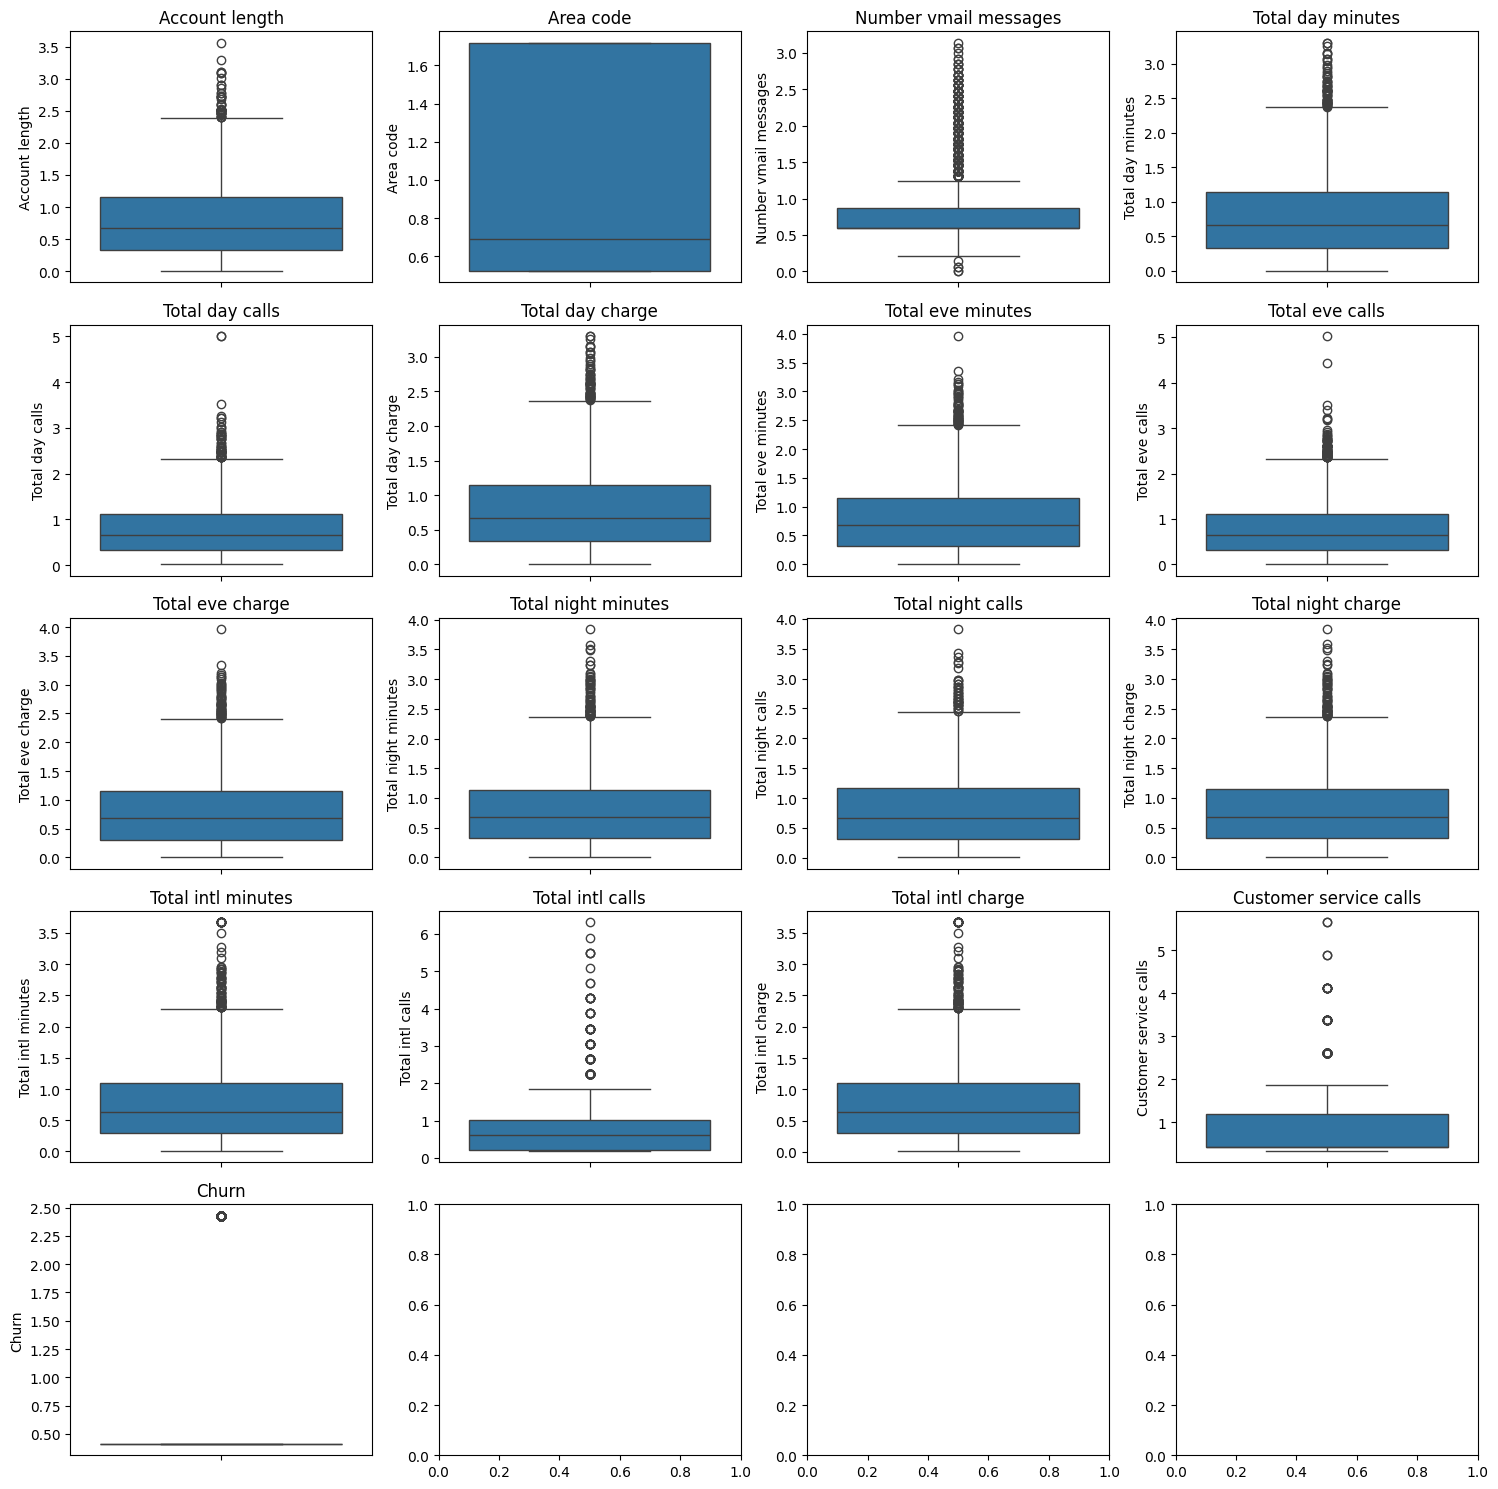

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### Understanding the Issue:

Having around 700 rows identified as outliers indicates a potential problem with the data or the outlier detection method.

Potential Causes:

Data Quality Issues:

Errors or inconsistencies in the data.

Extreme values that are not genuine outliers.

Aggressive Outlier Detection:
The Z-score threshold of 3 might be too strict for your data.

Data Distribution:
The data might not follow a normal distribution, making Z-scores less reliable.
Steps to Address the Issue:

Visualize Data:

Create histograms, box plots, and scatter plots for numerical columns to identify unusual patterns or distributions.

Adjust Outlier Detection Threshold:
Experiment with different Z-score thresholds (e.g., 2.5, 3.5) to find a suitable value.

In [ ]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,0.018083,-0.013174,-0.015207,0.017169,-0.015202,0.013960,0.022926,0.013962,-0.004666,-0.009918,-0.004634,0.022636,-0.014802,0.022637,-0.048763,-0.011043
Area code,0.018083,1.000000,-0.006353,0.002003,0.005695,0.002004,-0.025626,0.011644,-0.025632,-0.028142,0.025771,-0.028203,0.008332,-0.009219,0.008458,0.013009,0.006832
Number vmail messages,-0.013174,-0.006353,1.000000,-0.005461,-0.008485,-0.005448,-0.005159,-0.015139,-0.005173,0.017098,-0.011788,0.017125,0.005428,0.004940,0.005399,-0.000548,-0.069175
Total day minutes,-0.015207,0.002003,-0.005461,1.000000,0.024112,1.000000,0.002256,-0.002295,0.002251,0.000601,0.023869,0.000572,-0.007307,0.025400,-0.007198,0.011228,0.246301
Total day calls,0.017169,0.005695,-0.008485,0.024112,1.000000,0.024102,0.000520,0.015373,0.000516,0.001059,-0.005487,0.001020,-0.004137,-0.002076,-0.004176,-0.005937,0.038462
Total day charge,-0.015202,0.002004,-0.005448,1.000000,0.024102,1.000000,0.002253,-0.002304,0.002249,0.000587,0.023852,0.000559,-0.007314,0.025403,-0.007205,0.011235,0.246301
Total eve minutes,0.013960,-0.025626,-0.005159,0.002256,0.000520,0.002253,1.000000,0.036072,0.999999,-0.018695,0.019411,-0.018708,0.013744,0.014656,0.013635,-0.002261,0.025612
Total eve calls,0.022926,0.011644,-0.015139,-0.002295,0.015373,-0.002304,0.036072,1.000000,0.036060,0.000073,-0.014961,0.000030,-0.015315,-0.004606,-0.015455,0.016854,-0.001297
Total eve charge,0.013962,-0.025632,-0.005173,0.002251,0.000516,0.002249,0.999999,0.036060,1.000000,-0.018687,0.019415,-0.018700,0.013716,0.014630,0.013607,-0.002298,0.025575
Total night minutes,-0.004666,-0.028142,0.017098,0.000601,0.001059,0.000587,-0.018695,0.000073,-0.018687,1.000000,0.002967,0.999998,0.026949,-0.028167,0.026986,-0.013889,-0.030401


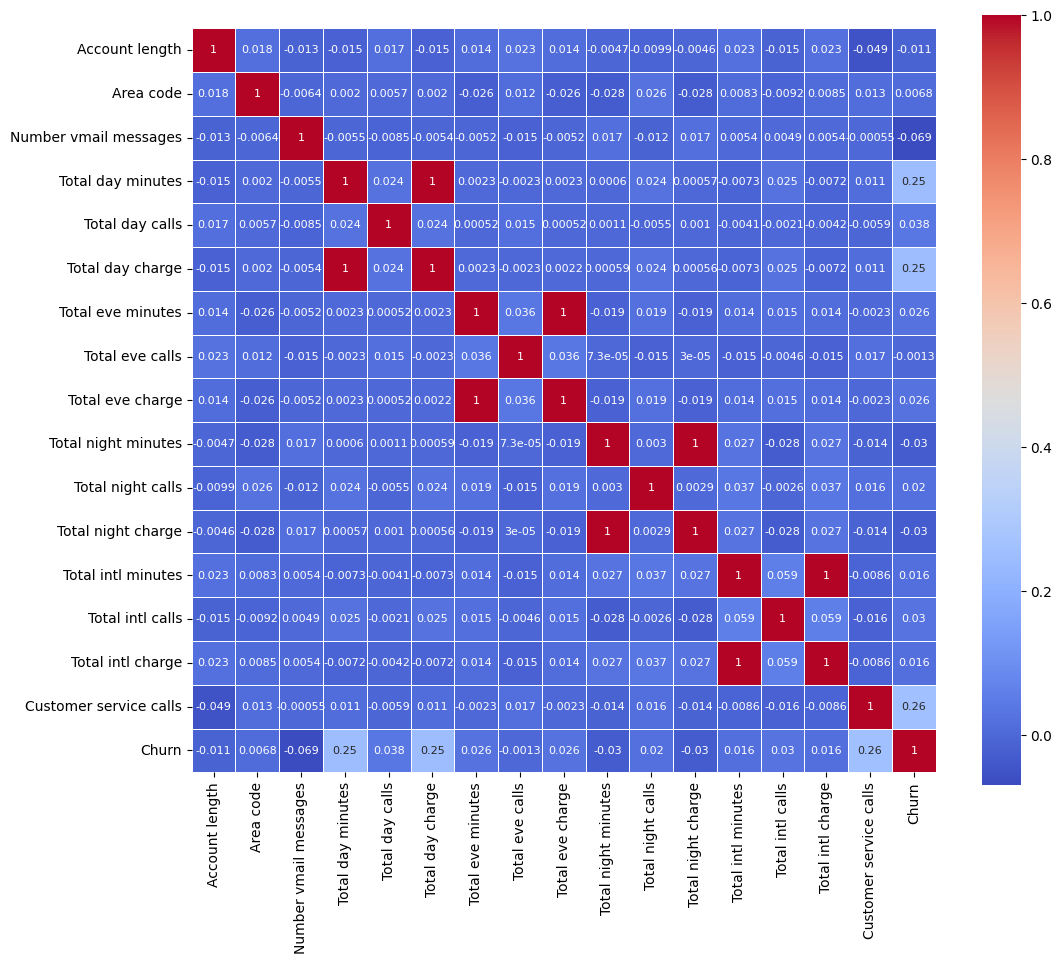

In [ ]:

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 8} )# Adjust font size and other parameters
plt.show()


# categorical encoding

In [ ]:
# One-hot encode the 'State' column
df = pd.get_dummies(df, columns=['State'], prefix='State')



In [ ]:
# Display the encoded DataFrame
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.676489,0.523603,False,True,1.234883,1.566767,0.476643,1.567036,0.070610,0.055940,...,False,False,False,False,False,False,False,False,False,False
1,0.149065,0.523603,False,True,1.307948,0.333738,1.124503,0.334013,0.108080,0.144867,...,False,False,False,False,False,False,False,False,False,False
2,0.902529,0.523603,False,False,0.591760,1.168304,0.675985,1.168464,1.573383,0.496279,...,False,False,False,False,False,False,False,False,False,False
3,0.428590,0.688834,True,False,0.591760,2.196596,1.466936,2.196759,2.742865,0.608159,...,False,False,False,False,False,False,False,False,False,False
4,0.654629,0.523603,True,False,0.591760,0.240090,0.626149,0.240041,1.038932,1.098699,...,False,False,False,False,False,False,False,False,False,False


## Feature Selection

Feature selection is a crucial step in machine learning to identify the most relevant features for a model. It helps improve model performance, reduces overfitting, and enhances interpretability.

Types of Feature Selection:

There are primarily three types of feature selection methods:

Filter Methods: These methods assess the relevance of features independently of the model.

    Correlation-based: Measures the correlation between features and the target variable.
    Chi-squared test: For categorical features and categorical target variables.
    ANOVA: For numerical features and categorical target variables.
Wrapper Methods: These methods evaluate different combinations of features based on the performance of a model.

    Recursive Feature Elimination (RFE): Recursively eliminates features based on their importance.
    Forward and Backward Selection: Gradually adds or removes features to optimize model performance.

Embedded Methods: These methods learn which features are important as part of the model training process.

    Regularization techniques (L1 and L2): Penalize large coefficients, effectively performing feature selection.
    Decision Trees: Feature importance can be derived from the tree structure.

### Filter Method: Correlation Analysis
Calculate the correlation between numerical features and the target variable (Churn).
Select features with a significant correlation (positive or negative).

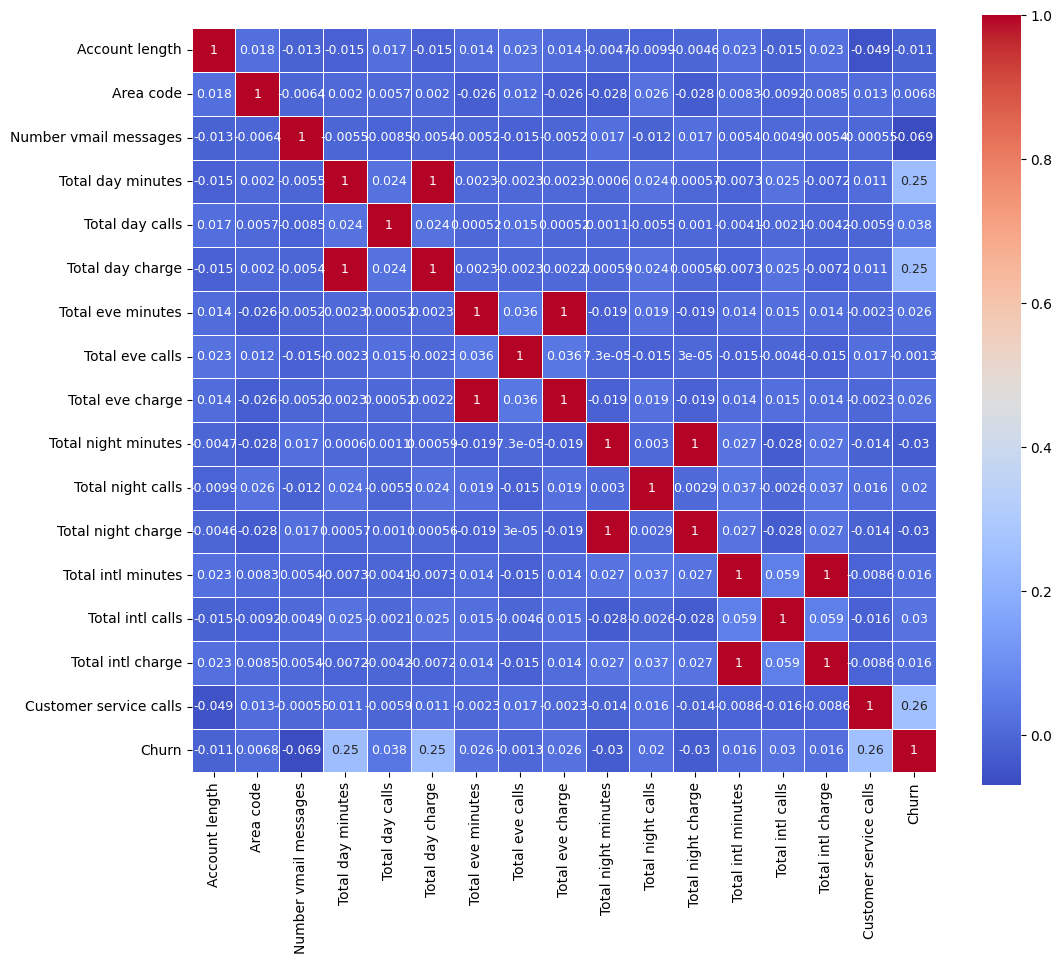

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 9})  # Adjust font size and other parameters
plt.show()

In [ ]:
# Calculate derived features
df['total_calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']
df['average_call_duration'] = (df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes'] + df['Total intl minutes']) / df['total_calls']
df['total_charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
df['average_call_charge'] = df['total_charge'] / df['total_calls']


In [ ]:
df.shape

(3333, 74)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 74 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   float64
 1   Area code               3333 non-null   float64
 2   International plan      3333 non-null   bool   
 3   Voice mail plan         3333 non-null   bool   
 4   Number vmail messages   3333 non-null   float64
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   float64
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   float64
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   float64
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

### SelectKbest -Filter method


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object','bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

X_categorical = df[categorical_cols]
X_numerical = df[numerical_cols]

# Chi-squared test for categorical features
chi_selector = SelectKBest(chi2, k=10)  # Adjust k as needed
X_chi = chi_selector.fit_transform(X_categorical, y)
chi_selected_features = X_categorical.columns[chi_selector.get_support()]

# ANOVA for numerical features
f_selector = SelectKBest(f_classif, k=10)
X_f = f_selector.fit_transform(X_numerical, y)
f_selected_features = X_numerical.columns[f_selector.get_support()]

print("Chi-squared selected features:", chi_selected_features)
print("ANOVA selected features:", f_selected_features)


Chi-squared selected features: Index(['International plan', 'Voice mail plan', 'State_AZ', 'State_CA',
       'State_HI', 'State_MD', 'State_NJ', 'State_SC', 'State_TX', 'State_VA'],
      dtype='object')
ANOVA selected features: Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Customer service calls', 'Churn', 'total_calls',
       'average_call_duration', 'total_charge', 'average_call_charge'],
      dtype='object')


### 2. Wrapper Method: Recursive Feature Elimination (RFE)
Create a logistic regression model (for classification).
Use RFE to iteratively remove features based on their importance.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.info()

In [ ]:
df['Churn']=df['Churn'].astype('int64')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'Churn' is the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Create a logistic regression model
model = LogisticRegression()

# Create RFE object
rfe = RFE(model, n_features_to_select=25)  # Adjust n_features_to_select as needed
fit = rfe.fit(X, y)

# Print selected features
print("Selected features: %s" % X.columns[fit.support_])
print("Feature ranking: %s" % fit.ranking_)


Selected features: Index(['International plan', 'Voice mail plan', 'Total day minutes',
       'Total day charge', 'Customer service calls', 'State_AK', 'State_AL',
       'State_AZ', 'State_CA', 'State_DC', 'State_HI', 'State_IL', 'State_ME',
       'State_MI', 'State_MS', 'State_MT', 'State_NJ', 'State_NV', 'State_RI',
       'State_SC', 'State_TX', 'State_VA', 'State_VT', 'State_WA', 'State_WI'],
      dtype='object')
Feature ranking: [44 28  1  1  7  1 23  1 35 45 27 16 39 19 36 25 49  1  1  1 32  1  1 18
 22  1 46 12 40  1  3 33  1 47  5 24 14  4  2  1  1  6 15  1  1 31 42  8
 30  1 43  1  9 26 34 37 21  1  1 13 17  1 29  1  1  1  1 10 11 38 48 20
 41]


### 3. Embedded Methods

Regularization Techniques:
    
    Lasso (L1 regularization): Automatically performs feature selection by shrinking coefficients of less important features to zero.
    
    Ridge (L2 regularization): Reduces the impact of less important features but doesn't eliminate them completely.

Decision Trees: Feature importance can be derived from the tree structure.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso for feature selection
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
model = lasso.fit(X, y)
selected_features = X.columns[model.coef_ != 0]


Lasso regression penalizes large coefficients during model training. By setting alpha to a non-zero value, Lasso shrinks the coefficients of less important features towards zero. In the limit, some coefficients become exactly zero, effectively removing those features from the model.

The code cleverly uses this behavior for feature selection. By looking at the non-zero coefficients after fitting the Lasso model, we can identify features considered important by the model and potentially relevant for prediction.

The choice of alpha impacts the number of features selected. A higher alpha leads to more features with zero coefficients.

Lasso is a good choice for feature selection when interpretability is important, as features with zero coefficients are effectively excluded from the model.

Other regularization techniques like Ridge regression (L2 regularization) can also be used for feature selection.

In [ ]:
selected_features

Index(['Total day minutes', 'Total day charge', 'Customer service calls',
       'total_charge'],
      dtype='object')